In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

Things We will do here:
1. We will first try to find (just find) all the missing values.
2. Numerical Values
3.Distribution of numerical values
4. Categorical Variables
5. Cardinality of Categorical Values
6/ Outlier
7. Relation between the IV and DVs.


In [24]:
dataset = pd.read_csv('amazon.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   Category 2           1465 non-null   object
 4   discounted_price     1465 non-null   object
 5   actual_price         1465 non-null   object
 6   discount_percentage  1465 non-null   object
 7   rating               1465 non-null   object
 8   rating_count         1463 non-null   object
 9   about_product        1465 non-null   object
 10  user_id              1465 non-null   object
 11  user_name            1465 non-null   object
 12  review_id            1465 non-null   object
 13  review_title         1465 non-null   object
 14  review_content       1465 non-null   object
 15  img_link             1465 non-null   object
 16  produc

In [25]:
#df = pd.DataFrame.drop(dataset['product_id'])
dataset.head()
print(dataset['product_id'].dtype)
df = dataset.drop(columns= ['product_id','user_id','user_name','review_id','review_content','img_link','product_link'])
df.head()

object


,product_name,category,Category 2,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories,|Accessories&Peripherals|Cables&Accessories|Ca...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo..."
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories,|Accessories&Peripherals|Cables&Accessories|Ca...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go..."
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories,|Accessories&Peripherals|Cables&Accessories|Ca...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories,|Accessories&Peripherals|Cables&Accessories|Ca...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories,|Accessories&Peripherals|Cables&Accessories|Ca...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second..."


Sure, here are ten questions you can explore for Exploratory Data Analysis (EDA) using the provided dataset:

1. **Data Summary:**
   - What is the structure of the dataset? (Number of rows and columns)
   - What are the data types of each column?

2. **Data Cleaning:**
   - Are there any missing values in the dataset? If so, how many and in which columns?
   - Are there any inconsistencies in the data types? If yes, how can you convert them to the correct data types?

3. **Category Distribution:**
   - How many unique categories are there in the dataset?
   - What is the distribution of products across different categories?

4. **Price Analysis:**
   - What is the average, minimum, and maximum discounted price of products?
   - Is there any relationship between discounted price and actual price?

5. **Discount Percentage Analysis:**
   - What is the average discount percentage offered on products?
   - Are there any outliers in the discount percentage distribution?

6. **Rating Analysis:**
   - What is the distribution of ratings given to products?
   - Is there any correlation between ratings and the number of ratings given?

7. **Review Analysis:**
   - What are the most common words used in review titles or product descriptions?
   - Can you identify any patterns or sentiments in the reviews?

8. **Category 2 Analysis:**
   - How many unique values are there in the 'Category 2' column?
   - What is the distribution of products across different values of 'Category 2'?

9. **Correlation Analysis:**
   - Is there any correlation between the discount percentage and ratings?
   - Are there any relationships between other numerical variables in the dataset?

10. **Visualization:**
    - Create visualizations (histograms, scatter plots, box plots, etc.) to represent the distribution and relationships between different variables in the dataset. Use matplotlib and seaborn libraries for this purpose.

These questions should provide a good starting point for your EDA using Python and the specified libraries. Remember to explore the data thoroughly and draw meaningful insights from it.

TRYING TO MISSING VALUES

1. Structure of Dataset

In [26]:
df.shape

(1465, 10)

In [27]:
df.describe

<bound method NDFrame.describe of                                            product_name  \
0     Wayona Nylon Braided USB to Lightning Fast Cha...   
1     Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     Sounce Fast Phone Charging Cable & Data Sync U...   
3     boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...                                                 ...   
1460  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                   category  \
0     Computers&Accessories   
1     Computers&Accessories   
2     Computers&Accessories   
3     Computers&Accessories   
4     Computers&Accessories   
...                     ...   
1460  Home&Kitchen|Kitchen&   
1461  Hom

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         1465 non-null   object
 1   category             1465 non-null   object
 2   Category 2           1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   review_title         1465 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


ANS: We have 10 columns and 1465 rows. In the 10 columns all are of data type object. few columns were dropped.
    Also, all the data/ columns are of dtype object, which mean that they all are coded as strings

Q2. Data Cleaning

In [29]:
features_with_na = [features for features in dataset.columns if dataset[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4), '% missing values')
features_with_na

#ratingcount = [feature for feature in df.columns if df['rating_count'].isnull().sum()>1]
#ratingcount
   

rating_count 0.0014 % missing values


['rating_count']

In [30]:
#there are inconsistencies in the data. the values that should be ints are also strings[actual_price , discounted_price,rating, rating_count] 
#values that are floats [percentage] are also strings


df.to_csv('df.csv',index = False)
df1 = pd.read_excel('df.xlsx')


In [31]:
pd.to_numeric(df1['rating'])
pd.to_numeric(df1['discount_percentage'])
pd.to_numeric(df1['rating_count'])
pd.to_numeric(df1['actual_price'])
pd.to_numeric(df1['discounted_price'])


0        399.0
1        199.0
2        199.0
3        329.0
4        154.0
         ...  
1460     379.0
1461    2280.0
1462    2219.0
1463    1399.0
1464    2863.0
Name: discounted_price, Length: 1465, dtype: float64

No missing value

unique_categories = df['category'].nunique()
print("Number of unique categories:", unique_categories)

In [32]:
unique_categories = df1['category'].nunique()
print("Number of unique categories:", unique_categories)

Number of unique categories: 20


In [33]:
dis_value = df1['category'].value_counts
dis_value()

category
Computers&Accessories    453
Home&Kitchen|Kitchen&    309
Electronics|HomeTheat    162
Electronics|Mobiles&A    161
Home&Kitchen|Heating     116
Electronics|WearableT     76
Electronics|Headphone     66
OfficeProducts|Office     31
Electronics|HomeAudio     16
Home&Kitchen|HomeStor     16
Electronics|Cameras&P     16
Electronics|Accessori     14
Electronics|GeneralPu     14
Home&Kitchen|CraftMat      7
HomeImprovement|Elect      2
MusicalInstruments|Mi      2
Electronics|PowerAcce      1
Toys&Games|Arts&Craft      1
Car&Motorbike|CarAcce      1
Health&PersonalCare|H      1
Name: count, dtype: int64

. **Price Analysis:**
   - What is the average, minimum, and maximum discounted price of products?
   - Is there any relationship between discounted price and actual price?


In [34]:
df1['discounted_price'].describe()

count     1465.000000
mean      3125.310874
std       6944.304394
min         39.000000
25%        325.000000
50%        799.000000
75%       1999.000000
max      77990.000000
Name: discounted_price, dtype: float64

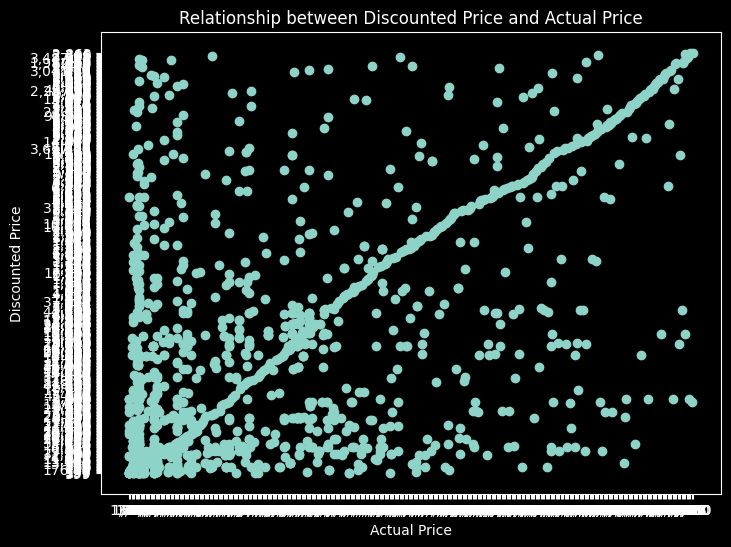

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

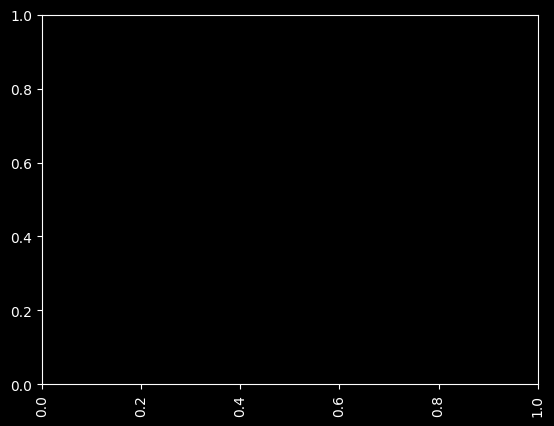

In [35]:


# Plotting the relationship between discounted price and actual price
plt.figure(figsize=(8, 6))
plt.scatter(df['actual_price'], df['discounted_price'])
plt.title('Relationship between Discounted Price and Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')
plt.show()
plt.xticks(rotation = 90)


With increase in actual price, discounted price also increases. So they have a positive relation

5.

In [36]:
average_disc_percentage = np.mean(df1['discount_percentage'])
average_disc_percentage

0.4769146757679181

Outlier

<Axes: xlabel='discount_percentage'>

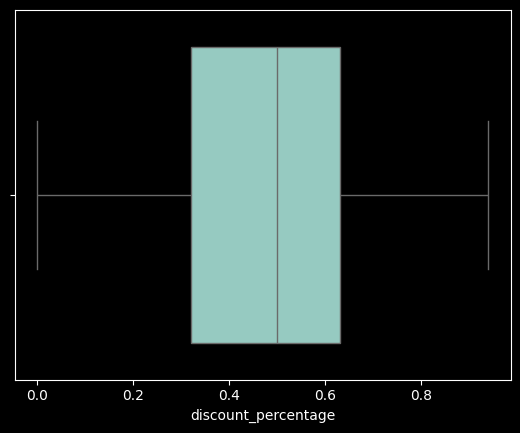

In [37]:
sns.boxplot(df1, x = 'discount_percentage')

There are no outliers

6.

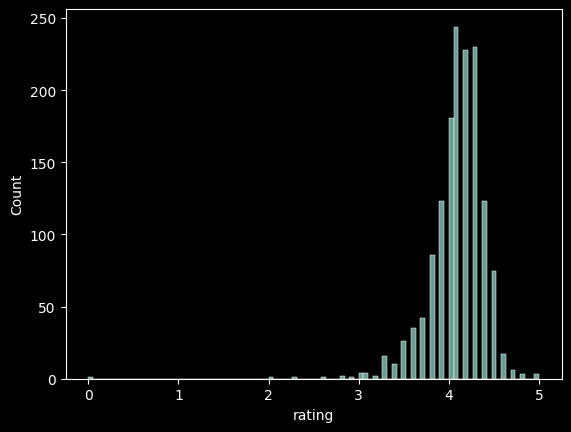

In [38]:
dist_rating = sns.histplot(df1, x = 'rating')

not normal

<Axes: xlabel='rating', ylabel='rating_count'>

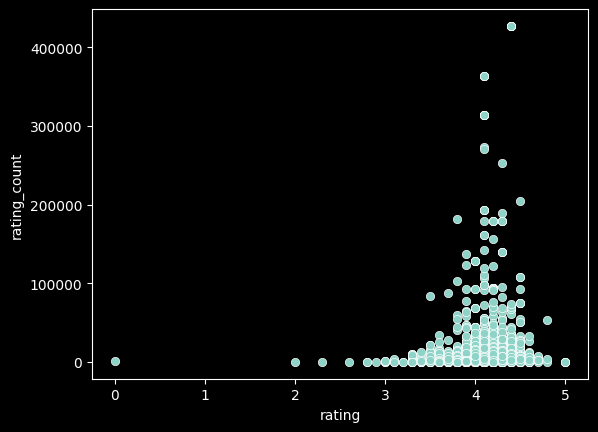

In [39]:
sns.scatterplot(df1, x = 'rating', y = 'rating_count')

No relation among the two variables

In [40]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.probability import FreqDist


In [41]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

# Tokenize review titles
word_tokens = word_tokenize(' '.join(df1['review_title']).lower())

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word not in stop_words]

# Count frequency of words
word_frequency = nltk.FreqDist(filtered_words)

# Get the most common word
most_common_word = word_frequency.most_common(1)
print("Most used word in review titles:", most_common_word)

Most used word in review titles: [('good', 1205)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


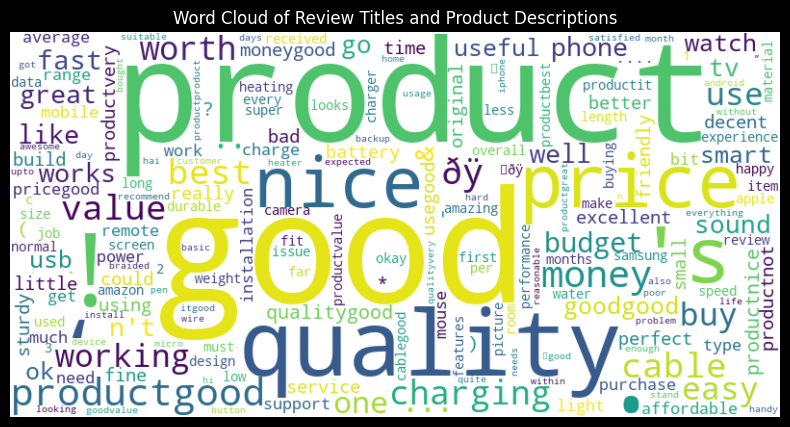

In [42]:


wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Titles and Product Descriptions')
plt.show()

Unique values in category 2 column

Sure, here are ten questions you can explore for Exploratory Data Analysis (EDA) using the provided dataset:

8. **Category 2 Analysis:**
   - How many unique values are there in the 'Category 2' column?
   - What is the distribution of products across different values of 'Category 2'?

9. **Correlation Analysis:**
   - Is there any correlation between the discount percentage and ratings?
   - Are there any relationships between other numerical variables in the dataset?

10. **Visualization:**
    - Create visualizations (histograms, scatter plots, box plots, etc.) to represent the distribution and relationships between different variables in the dataset. Use matplotlib and seaborn libraries for this purpose.

These questions should provide a good starting point for your EDA using Python and the specified libraries. Remember to explore the data thoroughly and draw meaningful insights from it.

In [43]:
df1['Category 2'].describe()

count                                                  1465
unique                                                  211
top       |Accessories&Peripherals|Cables&Accessories|Ca...
freq                                                    233
Name: Category 2, dtype: object

211 unique values

In [44]:
df1['Category 2'].describe()

count                                                  1465
unique                                                  211
top       |Accessories&Peripherals|Cables&Accessories|Ca...
freq                                                    233
Name: Category 2, dtype: object

<Axes: xlabel='Category 2', ylabel='count'>

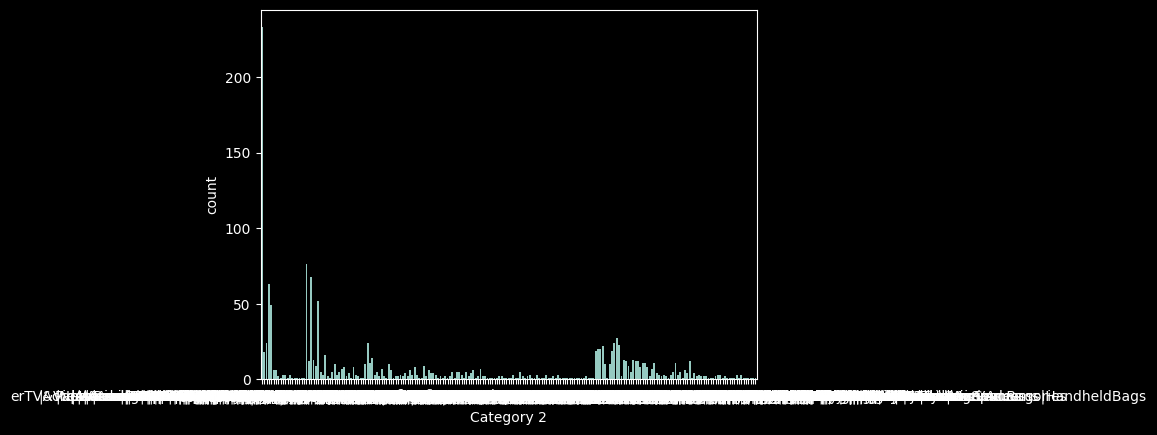

In [48]:
sns.countplot(df1, x = 'Category 2')

Not a normal distribution

array([[ 1.        , -0.13255588],
       [-0.13255588,  1.        ]])

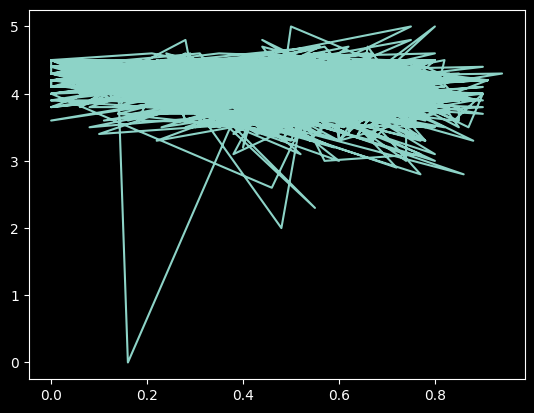

In [52]:

plt.plot(df1['discount_percentage'],df1['rating'])
np.corrcoef(df1['discount_percentage'],df1['rating'])

very weak negative correlation that suggests they increase together

In [53]:
df1.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1465.000000
mean,3125.310874,5444.990635,0.476915,4.093788,18270.564505
std,6944.304394,10874.826864,0.216359,0.310598,42729.995315
min,39.000000,39.000000,0.000000,0.000000,0.000000
25%,325.000000,800.000000,0.320000,4.000000,1173.000000
50%,799.000000,1650.000000,0.500000,4.100000,5178.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17325.000000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [64]:
df.describe()

,product_name,category,Category 2,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465
unique,1337,20,211,550,449,92,26,1143,1293,1194
top,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories,|Accessories&Peripherals|Cables&Accessories|Ca...,199,999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"Worked on iPhone 7 and didn’t work on XR,Good ..."
freq,5,453,233,53,120,56,244,9,6,10


In [72]:
df2 = df1.drop(columns= ['product_name','category' , 'Category 2','about_product', 'review_title'])
correlation_matrix = df2.corr()
print(correlation_matrix)

                     discounted_price  actual_price  discount_percentage  \
discounted_price             1.000000      0.961915            -0.242412   
actual_price                 0.961915      1.000000            -0.118098   
discount_percentage         -0.242412     -0.118098             1.000000   
rating                       0.114298      0.116629            -0.132556   
rating_count                -0.027010     -0.035890             0.010868   

                       rating  rating_count  
discounted_price     0.114298     -0.027010  
actual_price         0.116629     -0.035890  
discount_percentage -0.132556      0.010868  
rating               1.000000      0.098999  
rating_count         0.098999      1.000000  


discounted_price and actual_price have a strong positive correlation of approximately 0.96
discounted_price and discount_percentage have a moderate negative correlation of approximately -0.24. 
discount_percentage and rating_count have a weak positive correlation of approximately 0.01.
discount_percentage and rating have a weak negative correlation of approximately -0.13.
actual_price and rating have a weak positive correlation of approximately 0.12.
discounted_price and rating_count have a weak negative correlation of approximately -0.03.
discounted_price and rating have a weak positive correlation of approximately 0.11. 
actual_price and discount_percentage have a weak negative correlation of approximately -0.12.
rating and rating_count have a weak positive correlation of approximately 0.10.